In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

In [62]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [63]:
X_train.shape

(60000, 28, 28)

In [64]:
X_test.shape

(10000, 28, 28)

In [65]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [66]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

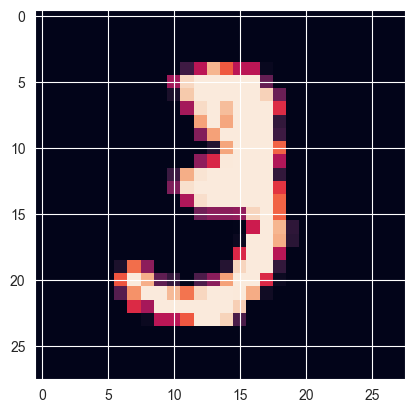

In [67]:
import matplotlib.pyplot as plt

plt.imshow(X_train[10])

range from 0-255 to 0-1

In [68]:
X_train = X_train / 255
X_test = X_test / 255

In [69]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax"),
])
#fully connected

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [72]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8197 - loss: 0.6395 - val_accuracy: 0.9500 - val_loss: 0.1746
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9572 - loss: 0.1470 - val_accuracy: 0.9625 - val_loss: 0.1255
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.1006 - val_accuracy: 0.9710 - val_loss: 0.0971
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9804 - loss: 0.0664 - val_accuracy: 0.9704 - val_loss: 0.0960
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.0523 - val_accuracy: 0.9724 - val_loss: 0.0909
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9873 - loss: 0.0424 - val_accuracy: 0.9733 - val_loss: 0.0917
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0314 - val_accuracy: 0.9738 - val_loss: 0.0925
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9933 - loss: 0.0230 - val_accuracy: 

In [73]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


In [74]:
y_prob

array([[5.0259786e-08, 1.8593328e-09, 1.4466981e-06, ..., 9.9999452e-01,
        1.1229959e-10, 2.2760740e-07],
       [7.9099763e-08, 2.9005171e-06, 9.9999642e-01, ..., 8.8833492e-13,
        2.0737929e-09, 2.8832789e-18],
       [2.6357582e-06, 9.9905390e-01, 6.6269873e-05, ..., 7.0318201e-04,
        8.2441322e-05, 5.3850126e-08],
       ...,
       [1.9554426e-14, 7.9757980e-12, 1.9656651e-15, ..., 1.7232894e-08,
        6.7952741e-11, 7.6583227e-08],
       [1.6562543e-11, 9.2600013e-15, 1.7490545e-13, ..., 1.0034972e-10,
        1.0362037e-09, 3.0045711e-13],
       [8.9685575e-09, 1.7609159e-15, 6.9746336e-15, ..., 4.1065717e-18,
        4.8914892e-13, 3.3285870e-17]], dtype=float32)

In [75]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [76]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

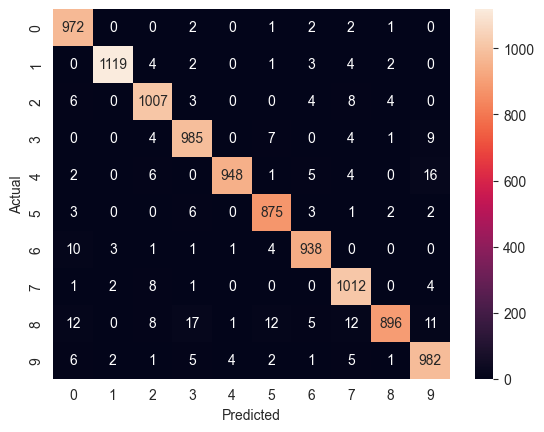

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.99      0.92      0.95       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



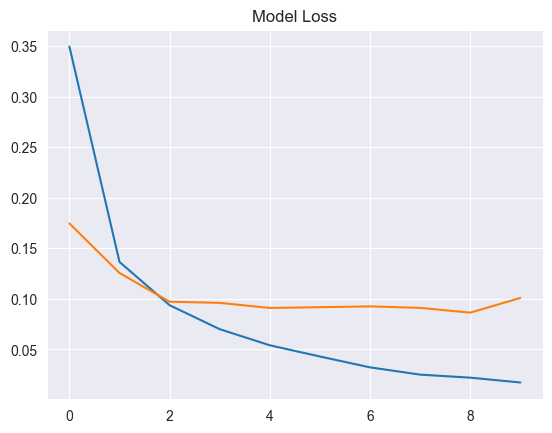

In [80]:
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

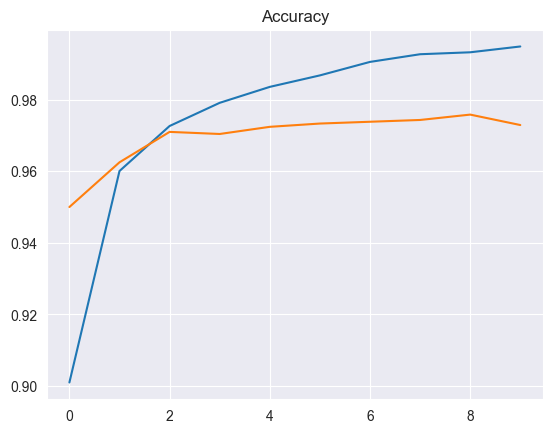

In [82]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

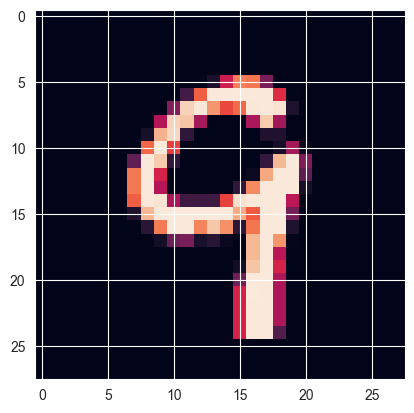

In [90]:
plt.imshow(X_test[150])

In [91]:
 y_pred[150]

np.int64(9)